<center> 

# Probability

## Dr. Lange- University of Chicago
## Data 11800 - Winter 2024 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="500" height="600">
    
</center>

In [8]:
import numpy as np
import pandas as pd



import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## So far...

DataFrame manipulation 

Python Coding

Data Collection + Sampling


## Simulation

We can use the np.random.choice function in combination with for loops to *simulate* an experiment, or to repeat an experiment!

There are several steps in designing and executing a simulation:

 - Conceptualize what to simulate;
 
 - Simulate one instance;
 
 - Decide on the number of repetitions;
 
 - Summarize the results of the simulation.

## Let's simulate an experiment.

Rolling a six sided die 100 times. Count how many rolls are $\geq$ 3.

One instance corresponds to rolling one die and counting the number greater than 3.

We need to

 -  define a die
 
 -  produce 1 random number

 -  count a 1 if this random number is $>$ 3.

We will need the np.random.choice() function here!!!

```python 
np.random.choice(my_array, size = num, replace = True) 
```

In [1]:
import numpy as np
import pandas as pd

die = np.arange(1, 7)
die

array([1, 2, 3, 4, 5, 6])

#### One instance...

In [2]:
one_roll = np.random.choice(die, 1)
print(one_roll)

#check if greater than or equal to 3
one_roll > 3


count = 0
if one_roll>3:
    count = count +1
    
count

[3]


0

#### How do we extend this? What about 2 rolls?

In [3]:
two_rolls = np.random.choice(die, 2)
print(two_rolls)

#check if greater than or equal to 3
two_rolls >3

count = 0
if two_rolls>3:
    count = count +1
    
count




[1 6]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
#This also works
sum(two_rolls >3)

1

#### How do we extend this to get our answer? n =100

In [5]:
n_rolls = np.random.choice(die, 100)
print(n_rolls)

#check if greater than or equal to 3
print(n_rolls >=3)

sum(n_rolls >3)

[2 1 1 4 1 1 4 4 4 3 1 6 1 4 4 2 3 5 1 1 6 6 4 6 2 5 5 5 3 5 4 5 5 1 1 2 3
 1 3 1 3 4 1 3 6 4 2 6 2 5 5 3 4 2 1 2 5 4 2 5 6 2 1 6 3 3 6 1 2 5 4 5 1 5
 3 3 6 6 5 2 4 3 2 4 4 5 6 3 2 4 2 1 2 1 4 1 6 1 4 1]
[False False False  True False False  True  True  True  True False  True
 False  True  True False  True  True False False  True  True  True  True
 False  True  True  True  True  True  True  True  True False False False
  True False  True False  True  True False  True  True  True False  True
 False  True  True  True  True False False False  True  True False  True
  True False False  True  True  True  True False False  True  True  True
 False  True  True  True  True  True  True False  True  True False  True
  True  True  True  True False  True False False False False  True False
  True False  True False]


48

This is one experiment. Rolling a six sided die 100 times and counting the number of values $>$ 3.

Is this number close to what we might have guessed? To see where this number falls, we might perform another experiment!!!!!!
New experiment: Repeat this experiment 1000 times!!! This means

Repeat 1000 times:
    Rolling a six sided die 100 times and counting the number of values $>$ 3.

In [7]:
stored_values = []
num_experiments = 1000


for i in np.arange(num_experiments): #this goes from 0 to 999
    n_rolls = np.random.choice(die, 100)
    stored_values.append(sum(n_rolls >3))

NameError: name 'plt' is not defined

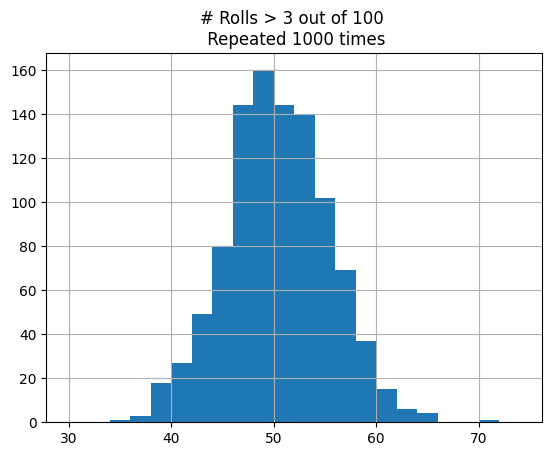

In [8]:
pd.DataFrame({'# Rolls > 3 out of 100 \n Repeated ' +str(num_experiments) + ' times': stored_values}).hist(bins=np.arange(30, 75,2));
plt.xlabel('Number of Rolls')
plt.ylabel('Frequency')

### Simulation


- another method of data collection
    - computer mimics a real world situation
    
- contains an element of randomness....    

### New Goal: Learn some Statistics

Motivation: 

1. To understand randomness better

    - `np.random.choice(['red','blue])` vs `np.random.choice(['red','blue], p =[0.2, 0.8])`


2. **Statistics can help us understand our data!!!!**

How do we make conclusions about the data? We use statistics.


<center>

<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/stat_inference.png" width="700">
    
</center>

## Probability

Probability is the science of how likely events are to happen.

The probability of something occuring is a number between 0 and 1. (thought of as a percentage)


- 0 impossible to happen

- 1 (guaranteed to occur)

In more technical terms....

# Probability: Definitions and Rules 


**Random phenomenon or chance experiment**:  where individual outcomes are uncertain


**Random Variable (denoted by X)**: Represents the outcome of the experiment.

**Sample space (denoted by S)**: the set, or collection, of all possible outcomes of a phenomenon


**Event (denoted by A, B)**: An outcome or a set of outcomes of a random phenomenon


**For example,** Rolling a six-sided die and recording the outcome (this is the random phenomenon)
Let $X$ denote the outcome of this experiment. (Note here $X$ is the random variable)

The sample space S is the set of integers from 1 to 6: 

S=$\{1,2,3,4,5,6\}$

## Pause

What is a set? 

A **set** is a collection of objects! Usually denoted with { }

Sets are not ordered. We just care if the element is there or not.

{1,2,3} = {3,2,1} = {2,1,3} = {1,1,1,2,3} <--- The convention is to not repeat elements 



A collection of any objects can be in a set.

A = {'red', 1, 2, 3.1415}

**Notation**


Element of:

$x \in A$    ----> Says 'The element x is in A' or 'The x is an element of A'.

Subset of:

$C \subseteq A$  ---> Says 'The set C is contained in A'

Examples:
    
$\{1,2,'red'\} \subseteq \{1,2,3,4,'red', 'blue'\}$ 

$'red' \in \{1,2,'red'\}$

## Back to main program

 Rolling a six-sided die and recording the outcome (this is the random phenomenon)
Let $X$ denote the outcome of this experiment. (Note here $X$ is the random variable)

The sample space S is the set of integers from 1 to 6: 

S=$\{1,2,3,4,5,6\}$

We could be interested in the events:
A = 'An even number is rolled' = $\{2,4,6\}$.

E = 'A 3 is rolled.' = $\{3\}$.

**Another example** Randomly choosing 100 births at a Chicago hospital and recording the number of boys.

##### <code style="background:Thistle;color:black">What is the sample space?:</code>
 

Answer here:
    
The sample space is 

Some events: 

A is the event that less than half of the babies are boys. A is the set of integers from 0 to 49.

B is the event that less than 20 of the babies are boys. B is the set of integers from 0 to 19.

Now, how do we assign probabilities?

By defining what's called a **distribution function**. That is, a function that assigns probabilities to events!

We will be working with discrete sample spaces.


**Definition:** Suppose our experiment has a finite number of outcomes. Let $X$ be a random variable and $S$ the sample space. A **probability mass function (pmf)** for $X$ is a real valued function $m$ whose domain is $S$ and which satisfies:

 - $m(w) \geq 0$ for all outcomes $w \in S$
 
 - $\sum_{w \in S} m(w) =1$ 

For the event with just one outcome, $\{w\}$, the probability mass function function tells us that 

$P(\{w\}) = m(w)$.

Further, for any event, $E$, 

$P(E) = \sum_{w \in E} m(w)$

The following defines a collection of probabilites. 

##### <code style="background:Thistle;color:black">Is this a probability distribution?:</code>
 

| x| x = 0 | x = 1 | x =2 |
| :- | -: | :-: | :-: |  
| P(X=x) | $\frac{1}{4}$| $\frac{2}{4}$ | $\frac{1}{4}$

The following defines a collection of probabilites. 

##### <code style="background:Thistle;color:black">Is this a probability distribution?:</code>
 

| x| x = 0 | x = 1 | x =2 | x =3
| :- | -: | :-: | :-: |   :-: | 
| P(X=x) | $ - \frac{1}{2}$| $\frac{1}{2}$ | $\frac{1}{4}$| $\frac{3}{4}$

### Uniform Distribution

The **uniform distribution** on a discrete sample space $S$ is the function defined by

$$P(\{w\}) = m(w) = \frac{1}{n}$$

for every $w \in S$.


Each outcome is equally likely!

If $E$ is an event then $$P(E) = \text{Number of Outcomes in E} \cdot \frac{1}{n} = \frac{\text{Number of Outcomes in E}}{n}$$

**Back to example of rolling a die**

Rolling a fair 6 sided die follows a uniform distribution as every outcome is equally likely!

So $$P(\text{"rolling a 3"}) = P(\{3\})= m(3) = \frac{1}{6}$$


and 


$$P(\text{"rolling an even number"}) = P(\{2,4,6\})=m(3)$$
$$= \sum_{w \in \{2,4,6\}} m(w) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{3}{6}$$

##### <code style="background:Thistle;color:black">Concept Check: What if we toss a coin 3 times and we record the outcome of each flip?</code>


What is the sample space?


A. $\{H, T\}$


B. $\{HHH, HHT, HTH, HTT, TTH, TTT, THT, THH\}$

Each of the outcomes is equally likely -----> uniform distribution

##### <code style="background:Thistle;color:black">Concept Check: Let E be the event "get exactly 2 heads" Find P(E).</code>


$$P(E) = \frac{\text{# outcomes in event}}{\text{total outcomes}} = \frac{???}{???} $$

### Events

Recall an event is a subset of a sample space. It may be useful to combine or see how events interact.




Suppose we are rolling a 6 sided die and A is the event we roll an even $A = \{2, 4, 6\}$, $B$ is the event we roll at least a 4 so $B= \{4, 5, 6\}$.


We can define new events in the following ways:

**Complement of an event**: The complement of an event $A$ is the event that $A$ does not occur, denoted by $A^C$.

 $A^C$ is rolling an odd number: $A^C=\{1,3,5\}$ 

<center>

<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/complement.png" width="300">
    
</center>

**Compound events**: Events built from combinations of other events.

**Union:** ($A$ or $B$) = ($A\cup B$): set of all outcomes in $A$, or in $B$, or in both.

With $A = \{2, 4, 6\}$ and $B= \{4, 5, 6\}$ the union, or $A \cup B = \{2, 4, 5, 6\}$
<center>
    
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/union.png" width="300">
    
</center>

**Intersection:**  ($A$ and $B$) = ($A\cap B$): set of all outcomes that are in $A$ and in $B$.



With $A = \{2, 4, 6\}$ and $B= \{4, 5, 6\}$ the intersection, or $A \cap B = \{ 4, 6\}$
<center>
    
<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/intersection.png" width="300">
    
</center>


**Mutually exclusive events**: Events $A$ and $B$ are mutually exclusive (or disjoint) if they have no outcomes in common. Examples:
For example, A is the set of evens and B is rolling a 3. Then A and B are disjoint.


# **Rules of Probability:**
    
    
    
**Addition Rule** The rule of addition (also known as the "OR" rule) states that the probability of two or more **mutually exclusive** events occurring is the sum of the probabilities of the individual events occurring.

A = {2,4,6} (rolling evens)

B = {3} (rolling 3)

Then $P(A \text{ or } B) = P(A \cup B) = \frac{3}{6} + \frac{1}{6} = \frac{4}{6}$

**BE CAREFUL! Only true for mutually exclusive events!!!**

What happens if they do overlap?!

This is not mutually exclusive (they do overlap!)

A = {4, 6}  

B = {4, 5} 

Then $P(A \text{ or } B) =  P(A \cup B) =  \frac{2}{6} + \frac{1}{6} = \frac{3}{6} \neq \frac{4}{6}$

- $\text{P}(A \cup B) = \text{P}(A) +
\text{P}(B) - \text{P}(A \cap B)$   **True in general!!**

When can we multiply? Depends on....

**Independent events:**  Knowledge that an event $B$ has occured does not effect the probability that some other event A occurs.

Example: Rolling a die twice. First outcome has no effect on second.

The **multiplication rule** (also known as the "AND" rule) states that the probability of two independent events occurring together is equal to the product of their individual probabilities.

**Example:** Suppose you have a bag containing 3 red balls and 2 green balls. If you want to find the probability of drawing a red ball (then put this back in the bag: With replacement) and in the second draw you get a green ball, you would use the rule of multiplication:

A = {'red' on first}

B = {'green' on second}

$P(A \text{ and } B) = P(A \cap B)= P(A)*P(B) = \frac{3}{5}\cdot \frac{2}{5} = \frac{6}{25}$ We can do this because A and B are independent events.

**Complement Rule** 
Instead of computing the probability of an event directly, we can calculate the probability of everything else:
For any event E, 

$\text{P}(E^C) = 1 - \text{P}(E)$

For example, (again assume rolling a 6 sided die and recording the output)

if we want to compute $P(\text{rolling a number larger than 1})$ we can instead find 
$$1-P(\text{rolling a 1}) = 1 - \frac{1}{6} = \frac{5}{6}$$


If the complement is smaller, then the above formula is useful.

## Basic Probability Rules

-  $\text{P}(E^C) = 1 - \text{P}(E)$ for any event $E$

- $\text{P}(A \cup B) = \text{P}(A) +
\text{P}(B) - \text{P}(A \cap B)$


- Given two **independent** events, 
$\text{P}(A \cap B) = \text{P}(A)\text{P}(B)$

## Conditional Probability
We can also compute **conditional probabilities**. The conditional probability is the probability that an event B will occur given the knowledge than event A has already occured. This is denoted $P(B|A)$. <--- this is read as 'Probability of B given A'

For example, suppose we roll a six sided die once. Let random variable $X$ be the outcome. Suppose we have 

A = 'a 6 is rolled'

B= ' a number greater than 4 is rolled'


Now, suppose the die is rolled and we are told B has occured. 
Calculate the probability of A given that we know B has occured. 

We can think of this as restricting the sample space to the event B. Hence 
$$P(A |B) = \frac{\text{1 outcome in A that's also in B}}{\text{2 outcomes in B}}= \frac{1}{2}$$

In general $$P(A|B)= \frac{P(A \cap B)}{P(B)} $$



If $\text{P}(A) \ne 0$, the **conditional probability** of event $A$
given $B$ has occurred, denoted by $\text{P}(A|B)$, is defined by,

$$ P(A|B) = \frac{P(B \text{ and } A)}{P(B)}$$


<center>

<img src="https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/conditionalprobability.png" width="500">
    
</center>

Example:
- Select one subject at random in US;
- B is the event that the subject read a book last week;
- A is the event that the subject is a college student;
- Consider P(B|A) versus P(B): the fraction of college students who read a book last week is likely different than the fraction of US population who did not.


### Relationship between Intersections and Multiplication?!

**Multiplication rule**: $\text{P}(A \text{ and } B) = \text{P}(A|B) \text{P}(B)$. Note that this follows directly from the definition of conditional probability.

**If two events are independent**, where knowledge that an event $B$ has occured does not effect the probability that some other event A occurs then 
$\text{P}(A|B) =\text{P}(A)$ (or equivalently, $\text{P}(B|A) = \text{P}(B)$)

Equivalent condition for **independence**: 
$$\text{P}(A \text{ and } B)= \text{P}(A \cap B)  = \text{P}(A) \text{P}(B)$$

Hence to check for independence we can check for any of the following:


$P(A|B) = P(A)$

$P(B|A) = P(B)$ 

$P(A \cap B)  = P(A)P(B)$

**Small example**
We do not always have a uniform distribution where everything is equally likely...we could have a weighted distribution! 

Suppose we have 4 items in a bag: <span style = "color:red"> red marble </span>, <span style = "color:purple"> purple stone </span>, <span style = "color:green"> green stone </span>, <span style = "color:blue"> blue marble</span>
But the probabilites of drawing different colors are weighted:

$m('$<span style = "color:red"> red marble </span>$') = \frac{1}{3}$

$m('$<span style = "color:green"> green stone </span>$') = \frac{1}{6}$

$m('$<span style = "color:purple"> purple stone </span>$') = \frac{1}{12}$

$m('$<span style = "color:blue"> blue marble </span>$') = \frac{5}{12}$

<code style="background:Thistle;color:black"> Is the above a valid distribution function?
</code>

In [ ]:
answer

<code style="background:Thistle;color:black"> You randomly choose one item from the bag. What is the probability you choose a stone?
</code>

answer

<code style="background:Thistle;color:black"> Suppose you randomly choose one item from the bag and you know it is a marble. Given this info, what is the probability your item is purple?
</code>

In [ ]:
answer

<code style="background:Thistle;color:black"> Suppose you randomly choose one item from the bag and you know it is a marble. Given this info, what is the probability your item is blue?
</code>

In [ ]:
answer

We can calculate probabilities mathematically and also by simulation!

**For example:** suppose we roll a 6 sided die once. Since each outcome is equally likely to occur (i.e. this follows a uniform distribution), then we know

$P(\text{'rolling a 1'}) = \frac{1}{6}$

$P(\text{'rolling a 2'}) = \frac{1}{6}$

$P(\text{'rolling a 3'}) = \frac{1}{6}$

$P(\text{'rolling a 4'}) = \frac{1}{6}$

$P(\text{'rolling a 5'}) = \frac{1}{6}$

$P(\text{'rolling a 6'}) = \frac{1}{6}$


But we can also **simulate** this and estimate the probability **by observation**

Here we'll create and sample from a DataFrame!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

die = pd.DataFrame(
   {
       'Face': np.arange(1, 7),
   })
die

In [ ]:
die.sample(1)

In [ ]:
die.sample(5) ##Oops recall the default is to sample without replacement

In [ ]:
die.sample(100, replace = True)  #this creates a new dataframe with 100 number of rows

If we sample from a DataFrame, we can directly plot the results:

In [ ]:
#this code graphs the true distribution
portions = pd.DataFrame(
   {
       'Face': [1, 2, 3, 4, 5, 6],
   })
portions

In [ ]:
roll_bins = np.arange(0.5, 7, 1)
plt.hist(np.arange(1,7), density = True, bins=roll_bins)#

plt.scatter(3.5, 0.005, color='purple', s=30, zorder=2);
plt.title('True Distribution')  
plt.ylabel('Probability')
plt.xlabel('Roll of the Die')
plt.show()



In [ ]:
#roll_bins = np.arange(0.5, 7, 1)
#roll_bins
np.arange(1,7)

In [ ]:
# note, starting the bins at 0.5 will give us bars centered nicely over the face numbers
df= die.sample(12, replace=True) 
roll_bins = np.arange(0.5, 7, 1) 
df.hist(bins=roll_bins,density=True)
plt.title('12 rolls')
average = df.mean()

plt.scatter(average, 0.005, color='purple', s=30, zorder=2);
plt.ylabel('Probability')
plt.xlabel('Roll of the Die')

In [ ]:
df = die.sample(100, replace=True)
df.hist(bins=roll_bins, density=True)
plt.ylabel('Probability')
plt.title('100 rolls')
average = df.mean()
print(average)
plt.scatter(average, 0.005, color='purple', s=30, zorder=2);
plt.xlabel('Roll of the Die')


In [ ]:
df = die.sample(1000, replace=True)
df.hist(bins=roll_bins, density=True)
plt.ylabel('Probability')
plt.title('1000 rolls')
average = df.mean()
print(average)
plt.scatter(average, 0.005, color='purple', s=30, zorder=2);
plt.xlabel('Roll of the Die')


In [ ]:

df = die.sample(100_000, replace=True)
df.hist(bins=roll_bins, density=True)
plt.ylabel('Probability')
plt.title('100,000 rolls')
average = df.mean()
print(average)
plt.scatter(average, 0.005, color='purple', s=30, zorder=2);

plt.xlabel('Roll of the Die')

In fact, this has a special name. An **empirical distribution** is a distribution of observed data.

We can calculate the observed probabilies:

In [ ]:
empirical_probabilites = (die.sample(1_000, replace=True).value_counts())/1_000
empirical_probabilites 

In [ ]:
1/6